In [1]:
# Step 1: Setup and Install Libraries

# Google Colab typically has these pre-installed, but we'll include
# the installation commands to ensure they are available and up-to-date.

print("Installing/upgrading necessary libraries...")

# Install/upgrade TensorFlow (includes Keras)
!pip install --upgrade tensorflow --quiet

# Install/upgrade scikit-learn
!pip install --upgrade scikit-learn --quiet

# Install/upgrade matplotlib and pandas
!pip install --upgrade matplotlib pandas --quiet

print("Libraries installation complete!")

# Import all necessary libraries for our project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For enhanced visualizations

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # For scaling features
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\nAll libraries imported successfully.")

Installing/upgrading necessary libraries...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 106.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sour

--- Generated Synthetic Education Data (First 5 Rows) ---
   Study_Hours  Attendance_Rate  Previous_Grade  Parental_Support  Pass_Fail
0    11.490142       100.000000       63.248217                 4          1
1     9.585207        93.869505       68.554813                 2          1
2    11.943066        80.894456       62.075801                 1          0
3    14.569090        70.295948       66.920385                 2          1
4     9.297540        90.473350       51.063853                 5          1

Total students: 1000
Number of students who Passed: 845
Number of students who Failed: 155

--- Scaled Features (First 5 Rows) ---
[[0.56854883 1.         0.38747029 0.75      ]
 [0.47196829 0.90436915 0.47591355 0.25      ]
 [0.5915121  0.70196869 0.36793001 0.        ]
 [0.72465195 0.5366404  0.44867308 0.25      ]
 [0.45738351 0.85139183 0.18439756 1.        ]]

Shape of X_train: (800, 4)
Shape of X_test: (200, 4)
Shape of y_train: (800,)
Shape of y_test: (200,)

Generati

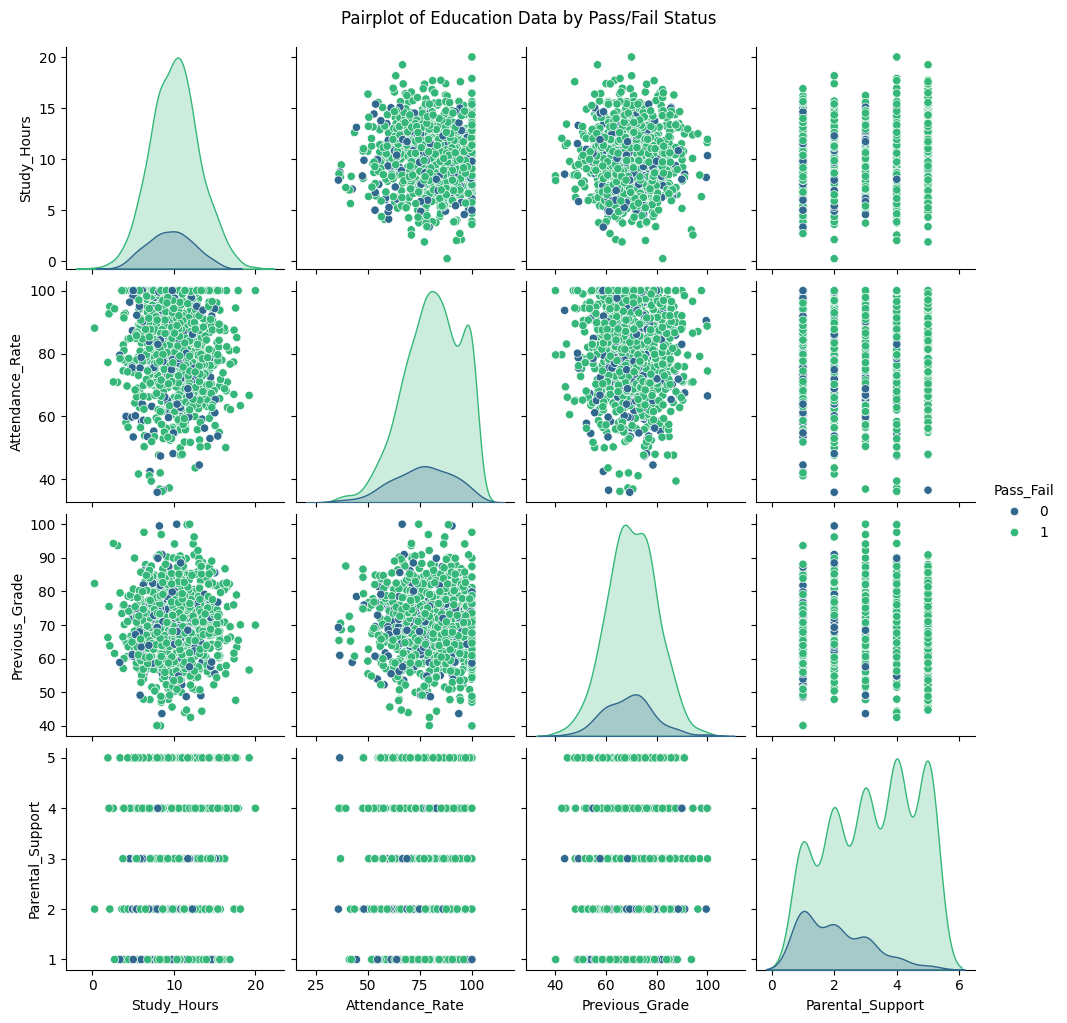

Pairplot generated.


In [10]:
# Step 2: Generate Synthetic Education Data

# We'll create a dataset that mimics factors influencing student performance.
# This data is randomly generated but designed to show some correlation.

np.random.seed(42) # For reproducibility

num_students = 1000

# Generate features
# Study Hours: Normally distributed, centered around 10 hours, with some spread
study_hours = np.random.normal(loc=10, scale=3, size=num_students)
study_hours = np.clip(study_hours, 0, 20) # Clip to realistic range (0-20 hours)

# Attendance Rate: Percentage, higher values mean better attendance
attendance_rate = np.random.normal(loc=80, scale=15, size=num_students)
attendance_rate = np.clip(attendance_rate, 30, 100) # Clip to realistic range (30-100%)

# Previous Grade: Score from 0-100
previous_grade = np.random.normal(loc=70, scale=10, size=num_students)
previous_grade = np.clip(previous_grade, 40, 100) # Clip to realistic range (40-100)

# Parental Support: Scale from 1 to 5 (e.g., 1=low, 5=high)
parental_support = np.random.randint(1, 6, size=num_students)

# Create a DataFrame
data = pd.DataFrame({
    'Study_Hours': study_hours,
    'Attendance_Rate': attendance_rate,
    'Previous_Grade': previous_grade,
    'Parental_Support': parental_support
})

# Generate the target variable (Pass/Fail)
# A simple rule: higher study hours, attendance, previous grade, and parental support lead to a pass.
# Add some randomness to make it more realistic (not perfectly separable).
# The 'noise' term makes it so not every high-performing student passes, and vice-versa.
base_score = (data['Study_Hours'] * 0.1) + \
             (data['Attendance_Rate'] * 0.05) + \
             (data['Previous_Grade'] * 0.03) + \
             (data['Parental_Support'] * 1.0)

# Introduce some randomness to the pass/fail outcome
noise = np.random.normal(loc=0, scale=2.5, size=num_students) # Increased scale of noise
pass_threshold = 7.0 # Adjusted threshold for passing to create more balanced classes

# Students pass if their base_score + noise is above the threshold
data['Pass_Fail'] = (base_score + noise > pass_threshold).astype(int)

print("--- Generated Synthetic Education Data (First 5 Rows) ---")
print(data.head())
print(f"\nTotal students: {num_students}")
print(f"Number of students who Passed: {data['Pass_Fail'].sum()}")
print(f"Number of students who Failed: {num_students - data['Pass_Fail'].sum()}")

# Separate features (X) and target (y)
X = data[['Study_Hours', 'Attendance_Rate', 'Previous_Grade', 'Parental_Support']]
y = data['Pass_Fail']

# --- Feature Scaling ---
# It's crucial to scale features for neural networks, as they are sensitive to input ranges.
# MinMaxScaler scales features to a given range, typically 0 to 1.
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) # Fit the scaler on X and transform it

print("\n--- Scaled Features (First 5 Rows) ---")
print(X_scaled[:5])

# Split the scaled data into training and testing sets
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y ensures that the proportion of pass/fail students is the same in train and test sets

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Visualize relationships (Pairplot can be insightful for multiple features)
# This might take a moment to generate.
print("\nGenerating pairplot (this might take a moment)...")
sns.pairplot(data, hue='Pass_Fail', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Education Data by Pass/Fail Status', y=1.02) # Adjust title position
plt.show()
print("Pairplot generated.")

In [6]:
# Step 3: Build the Neural Network Model using Keras

# We'll create a Sequential model, which is a linear stack of layers.
# The complexity of the network (number of layers, neurons per layer) depends on the problem.
# For our synthetic data, a relatively simple network should suffice.

model = Sequential([
    # Input Layer and First Hidden Layer:
    # Dense layer: Each neuron in this layer is connected to every neuron in the previous layer.
    # 'units=64': This layer will have 64 neurons.
    # 'activation='relu'': Rectified Linear Unit activation function. It helps the network learn
    #                      complex, non-linear relationships.
    # 'input_shape=(X_train.shape[1],)': Specifies the shape of the input data.
    #                                    X_train.shape[1] gives us the number of features (columns) in our dataset.
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),

    # Second Hidden Layer:
    # Another Dense layer with 32 neurons and ReLU activation.
    # Adding more layers and neurons allows the network to learn more intricate patterns.
    Dense(units=32, activation='relu'),

    # Output Layer:
    # 'units=1': For binary classification (Pass/Fail), we need one output neuron.
    # 'activation='sigmoid'': The sigmoid activation function outputs a probability
    #                         between 0 and 1. If the output is > 0.5, we classify as Pass (1),
    #                         otherwise Fail (0).
    Dense(units=1, activation='sigmoid')
])

# Display the model summary to see its architecture and the number of trainable parameters.
print("--- Neural Network Model Architecture ---")
model.summary()

--- Neural Network Model Architecture ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Step 4: Compile the Model

# Compiling the model is a crucial step where you configure the learning process.
# You need to specify three key components:

# 1. Optimizer: This algorithm determines how the model's weights are updated during training
#    to minimize the loss function.
#    'Adam' is a very popular and effective optimizer for many deep learning tasks.
#    'learning_rate=0.001': Controls the step size at each iteration while moving towards
#                           a minimum of the loss function. A smaller learning rate means
#                           slower but potentially more stable learning.
optimizer = Adam(learning_rate=0.001)

# 2. Loss Function: This measures how well the model is performing by quantifying the
#    difference between the predicted output and the true labels. The goal of training
#    is to minimize this loss.
#    'binary_crossentropy': This is the standard loss function for binary classification problems
#                           where the output layer uses a sigmoid activation function.
loss_function = 'binary_crossentropy'

# 3. Metrics: These are used to monitor the training and testing steps. They are not
#    used for optimization but help you understand the model's performance.
#    'accuracy': Measures the proportion of correctly classified samples.
metrics_to_monitor = ['accuracy']

# Compile the model with the chosen optimizer, loss function, and metrics
model.compile(
    optimizer=optimizer,
    loss=loss_function,
    metrics=metrics_to_monitor
)

print("Model compiled successfully!")

Model compiled successfully!


Training the neural network...
Epoch 1/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9080 - loss: 0.6207 - val_accuracy: 1.0000 - val_loss: 0.4391
Epoch 2/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9975 - loss: 0.3852 - val_accuracy: 1.0000 - val_loss: 0.2201
Epoch 3/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9982 - loss: 0.1809 - val_accuracy: 1.0000 - val_loss: 0.0748
Epoch 4/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9966 - loss: 0.0633 - val_accuracy: 1.0000 - val_loss: 0.0249
Epoch 5/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9989 - loss: 0.0237 - val_accuracy: 1.0000 - val_loss: 0.0104
Epoch 6/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9970 - loss: 0.0183 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 7/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9912 - loss: 0.0344 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 8/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9942 - loss:

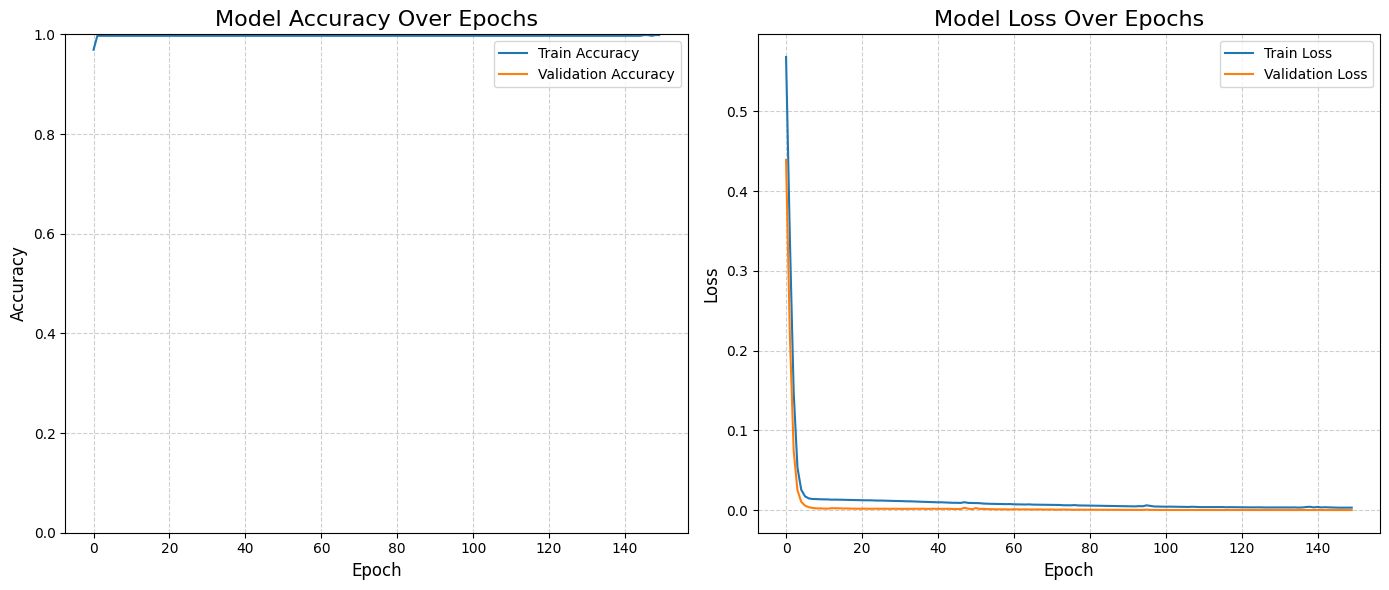

In [8]:
# Step 5: Train the Model

# Training is the process where the neural network learns from the data.
# It iteratively adjusts its internal weights to minimize the loss function.

print("Training the neural network...")

history = model.fit(
    X_train, y_train,        # Training features (X_train) and labels (y_train)
    epochs=150,              # Number of times the entire training dataset will be passed through the network.
                             # More epochs can lead to better learning but also overfitting.
    batch_size=32,           # Number of samples per gradient update. The model's weights are updated
                             # after processing each batch.
    validation_split=0.15,   # Use 15% of the training data as a validation set.
                             # This helps monitor for overfitting during training.
    verbose=1                # Set to 1 to see a progress bar and metrics for each epoch.
                             # Set to 0 for no output, 2 for one line per epoch.
)

print("\nModel training complete!")

# --- Visualize Training History ---
# It's crucial to visualize the training process to understand if the model is learning effectively
# and to detect issues like overfitting (where validation loss starts increasing while training loss decreases).

plt.figure(figsize=(14, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 1) # Accuracy is between 0 and 1

# Plot training & validation loss values
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() # Adjusts plot parameters for a tight layout
plt.show()

In [9]:
# Step 6: Evaluate the Model

# After training, it's essential to evaluate the model's performance on the
# completely unseen test data. This gives the most reliable indication of
# how well the model will perform on new, real-world student data.

print("Evaluating the model on the test set...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0) # verbose=0 suppresses progress bar

print(f"\n--- Model Evaluation Results ---")
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions on the test set
# The 'predict' method for a sigmoid output layer returns probabilities.
y_pred_proba = model.predict(X_test, verbose=0)

# Convert probabilities to binary class predictions (0 or 1)
# If the predicted probability is greater than 0.5, we classify it as a "Pass" (1),
# otherwise as a "Fail" (0).
y_pred = (y_pred_proba > 0.5).astype(int)

# --- Detailed Classification Report ---
# The classification report provides precision, recall, f1-score, and support
# for each class (Pass/Fail). This is very important for understanding performance
# beyond just overall accuracy, especially if one class is imbalanced.
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Fail (0)', 'Pass (1)']))

# --- Confusion Matrix ---
# A confusion matrix shows the number of correct and incorrect predictions made by the classification model
# compared to the actual outcomes.
# - True Positives (TP): Correctly predicted Pass
# - True Negatives (TN): Correctly predicted Fail
# - False Positives (FP): Predicted Pass, but was Fail (Type I error)
# - False Negatives (FN): Predicted Fail, but was Pass (Type II error)
cm = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix ---")
print(cm)

Evaluating the model on the test set...

--- Model Evaluation Results ---
Test Loss: 0.0001
Test Accuracy: 1.0000

--- Classification Report ---


ValueError: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter

In [11]:
# Step 3: Build the Neural Network Model using Keras

# We'll create a Sequential model, which is a linear stack of layers.
# The complexity of the network (number of layers, neurons per layer) depends on the problem.
# For our synthetic data, a relatively simple network should suffice.

model = Sequential([
    # Input Layer and First Hidden Layer:
    # Dense layer: Each neuron in this layer is connected to every neuron in the previous layer.
    # 'units=64': This layer will have 64 neurons.
    # 'activation='relu'': Rectified Linear Unit activation function. It helps the network learn
    #                      complex, non-linear relationships.
    # 'input_shape=(X_train.shape[1],)': Specifies the shape of the input data.
    #                                    X_train.shape[1] gives us the number of features (columns) in our dataset.
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),

    # Second Hidden Layer:
    # Another Dense layer with 32 neurons and ReLU activation.
    # Adding more layers and neurons allows the network to learn more intricate patterns.
    Dense(units=32, activation='relu'),

    # Output Layer:
    # 'units=1': For binary classification (Pass/Fail), we need one output neuron.
    # 'activation='sigmoid'': The sigmoid activation function outputs a probability
    #                         between 0 and 1. If the output is > 0.5, we classify as Pass (1),
    #                         otherwise Fail (0).
    Dense(units=1, activation='sigmoid')
])

# Display the model summary to see its architecture and the number of trainable parameters.
print("--- Neural Network Model Architecture ---")
model.summary()

--- Neural Network Model Architecture ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Step 4: Compile the Model

# Compiling the model is a crucial step where you configure the learning process.
# You need to specify three key components:

# 1. Optimizer: This algorithm determines how the model's weights are updated during training
#    to minimize the loss function.
#    'Adam' is a very popular and effective optimizer for many deep learning tasks.
#    'learning_rate=0.001': Controls the step size at each iteration while moving towards
#                           a minimum of the loss function. A smaller learning rate means
#                           slower but potentially more stable learning.
optimizer = Adam(learning_rate=0.001)

# 2. Loss Function: This measures how well the model is performing by quantifying the
#    difference between the predicted output and the true labels. The goal of training
#    is to minimize this loss.
#    'binary_crossentropy': This is the standard loss function for binary classification problems
#                           where the output layer uses a sigmoid activation function.
loss_function = 'binary_crossentropy'

# 3. Metrics: These are used to monitor the training and testing steps. They are not
#    used for optimization but help you understand the model's performance.
#    'accuracy': Measures the proportion of correctly classified samples.
metrics_to_monitor = ['accuracy']

# Compile the model with the chosen optimizer, loss function, and metrics
model.compile(
    optimizer=optimizer,
    loss=loss_function,
    metrics=metrics_to_monitor
)

print("Model compiled successfully!")

Model compiled successfully!


Training the neural network...
Epoch 1/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8423 - loss: 0.5797 - val_accuracy: 0.8583 - val_loss: 0.4435
Epoch 2/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8463 - loss: 0.4281 - val_accuracy: 0.8583 - val_loss: 0.3883
Epoch 3/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8457 - loss: 0.3945 - val_accuracy: 0.8583 - val_loss: 0.3838
Epoch 4/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8455 - loss: 0.3907 - val_accuracy: 0.8583 - val_loss: 0.3810
Epoch 5/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8422 - loss: 0.3939 - val_accuracy: 0.8583 - val_loss: 0.3784
Epoch 6/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8523 - loss: 0.3740 - val_accuracy: 0.8583 - val_loss: 0.3772
Epoch 7/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8553 - loss: 0.3625 - val_accuracy: 0.8583 - val_loss: 0.3791
Epoch 8/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8519 - loss: 0

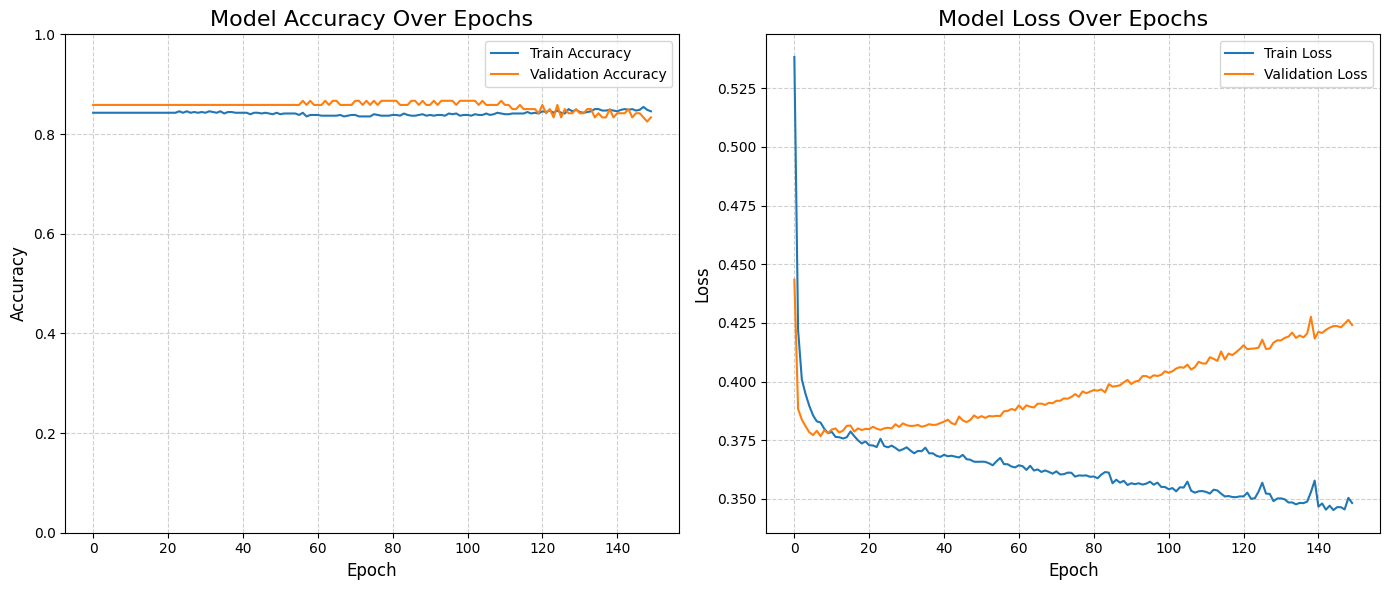

In [13]:
# Step 5: Train the Model

# Training is the process where the neural network learns from the data.
# It iteratively adjusts its internal weights to minimize the loss function.

print("Training the neural network...")

history = model.fit(
    X_train, y_train,        # Training features (X_train) and labels (y_train)
    epochs=150,              # Number of times the entire training dataset will be passed through the network.
                             # More epochs can lead to better learning but also overfitting.
    batch_size=32,           # Number of samples per gradient update. The model's weights are updated
                             # after processing each batch.
    validation_split=0.15,   # Use 15% of the training data as a validation set.
                             # This helps monitor for overfitting during training.
    verbose=1                # Set to 1 to see a progress bar and metrics for each epoch.
                             # Set to 0 for no output, 2 for one line per epoch.
)

print("\nModel training complete!")

# --- Visualize Training History ---
# It's crucial to visualize the training process to understand if the model is learning effectively
# and to detect issues like overfitting (where validation loss starts increasing while training loss decreases).

plt.figure(figsize=(14, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 1) # Accuracy is between 0 and 1

# Plot training & validation loss values
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() # Adjusts plot parameters for a tight layout
plt.show()

In [15]:
# Step 6: Evaluate the Model

# After training, it's essential to evaluate the model's performance on the
# completely unseen test data. This gives the most reliable indication of
# how well the model will perform on new, real-world student data.

print("Evaluating the model on the test set...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0) # verbose=0 suppresses progress bar

print(f"\n--- Model Evaluation Results ---")
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions on the test set
# The 'predict' method for a sigmoid output layer returns probabilities.
y_pred_proba = model.predict(X_test, verbose=0)

# Convert probabilities to binary class predictions (0 or 1)
# If the predicted probability is greater than 0.5, we classify it as a "Pass" (1),
# otherwise as a "Fail" (0).
y_pred = (y_pred_proba > 0.5).astype(int)

# --- Detailed Classification Report ---
# The classification report provides precision, recall, f1-score, and support
# for each class (Pass/Fail). This is very important for understanding performance
# beyond just overall accuracy, especially if one class is imbalanced.
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Fail (0)', 'Pass (1)']))

# --- Confusion Matrix ---
# A confusion matrix shows the number of correct and incorrect predictions made by the classification model
# compared to the actual outcomes.
# - True Positives (TP): Correctly predicted Pass
# - True Negatives (TN): Correctly predicted Fail
# - False Positives (FP): Predicted Pass, but was Fail (Type I error)
# - False Negatives (FN): Predicted Fail, but was Pass (Type II error)
cm = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix ---")
print(cm)

Evaluating the model on the test set...

--- Model Evaluation Results ---
Test Loss: 0.3917
Test Accuracy: 0.8350

--- Classification Report ---
              precision    recall  f1-score   support

    Fail (0)       0.33      0.06      0.11        31
    Pass (1)       0.85      0.98      0.91       169

    accuracy                           0.83       200
   macro avg       0.59      0.52      0.51       200
weighted avg       0.77      0.83      0.78       200


--- Confusion Matrix ---
[[  2  29]
 [  4 165]]


In [16]:
# Step 7: Make Predictions on New Student Data

# Once your neural network model is trained and evaluated, you can use it to make
# predictions on new, unseen student data. This is where the real-world application comes in.

# IMPORTANT: New data MUST be preprocessed (scaled) in the same way as the training data.
# We use the 'scaler' object that was fitted on the training data (X) in Step 2.

# Create hypothetical new student data
# Each row represents a student with: Study_Hours, Attendance_Rate, Previous_Grade, Parental_Support
new_student_data = pd.DataFrame([
    [12, 90, 85, 4],  # Student A: High effort, good background - likely Pass
    [5, 60, 50, 2],   # Student B: Low effort, struggling - likely Fail
    [8, 75, 70, 3],   # Student C: Average - could be borderline
    [15, 95, 92, 5]   # Student D: Very strong - very likely Pass
], columns=['Study_Hours', 'Attendance_Rate', 'Previous_Grade', 'Parental_Support'])

print("--- New Hypothetical Student Data ---")
print(new_student_data)

# Scale the new data using the SAME SCALER fitted on the training data
new_student_data_scaled = scaler.transform(new_student_data)

print("\n--- Scaled New Student Data ---")
print(new_student_data_scaled)

# Make predictions (probabilities) using the trained model
predictions_proba = model.predict(new_student_data_scaled)

# Convert probabilities to binary class predictions (0 or 1)
# 0 = Fail, 1 = Pass
predictions_class = (predictions_proba > 0.5).astype(int)

# Display the predictions
print("\n--- Predictions for New Students ---")
for i, (proba, student_class) in enumerate(zip(predictions_proba, predictions_class)):
    status = "Pass" if student_class == 1 else "Fail"
    print(f"Student {i+1}: Predicted Probability of Pass = {proba[0]:.4f}, Predicted Status = {status}")

# --- Saving and Loading Your Model ---
# It's good practice to save your trained model so you don't have to retrain it every time.
# This saves the model's architecture, weights, and training configuration.
model_save_path = 'student_performance_nn_model.h5'
model.save(model_save_path)
print(f"\nModel saved to: {model_save_path}")

# To load the model later (in a new Colab session or script):
# from tensorflow.keras.models import load_model
# loaded_model = load_model(model_save_path)
# print(f"Model loaded successfully from {model_save_path}")

--- New Hypothetical Student Data ---
   Study_Hours  Attendance_Rate  Previous_Grade  Parental_Support
0           12               90              85                 4
1            5               60              50                 2
2            8               75              70                 3
3           15               95              92                 5

--- Scaled New Student Data ---
[[0.59439869 0.84400795 0.75       0.75      ]
 [0.23949754 0.37603179 0.16666667 0.25      ]
 [0.39159803 0.61001987 0.5        0.5       ]
 [0.74649918 0.92200397 0.86666667 1.        ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



--- Predictions for New Students ---
Student 1: Predicted Probability of Pass = 0.9882, Predicted Status = Pass
Student 2: Predicted Probability of Pass = 0.4179, Predicted Status = Fail
Student 3: Predicted Probability of Pass = 0.8607, Predicted Status = Pass
Student 4: Predicted Probability of Pass = 0.9976, Predicted Status = Pass

Model saved to: student_performance_nn_model.h5
